In [55]:
import pandas as pd
from tqdm import tqdm
import gensim
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# os.chdir(r"D://Proposal_Defense//Simulations")
# from Utils.Script_utils import get_data_splits, first_LSTM_training, get_data_splits_old_algo
from joblib import Parallel, delayed
import sys
from scipy.stats import norm

In [56]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 42

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# # 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")
# tf.config.set_visible_devices([], 'GPU')

from tqdm.notebook import tqdm
tf.random.set_seed(seed_value)
import multiprocessing
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
# from keras import backend as K
# session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
# K.set_session(sess)

No GPU found


In [57]:
import matplotlib.pyplot as plt

import pickle

In [58]:
with open('..//Data_Generation//Data//train_valid_test_splits_50.pkl', 'rb') as f:
    catch = pickle.load(f)  

In [59]:
# var_weights = 0.08
# var_targets = 0.08

In [60]:
from tqdm.notebook import tqdm

In [61]:
import random

In [62]:
import numpy as np

In [63]:
import time

In [64]:
from scipy.stats import multivariate_normal as mvn

In [65]:
from scipy.stats import multivariate_normal as mvn

In [66]:
# train_fudged_probs

In [67]:
import matplotlib.pyplot as plt

In [68]:
from scipy.special import expit

In [69]:
# catch1[0][0]

In [70]:
# catch_train_logits_second[0]

In [71]:
from datetime import datetime

In [72]:
def expit(x):
    """Compute softmax values for each sets of scores in x."""
#     e_x = np.exp(x - np.max(x))
    return 1 / (1 + np.exp(-x))

In [73]:
from scipy.stats import gamma

In [74]:
# second_lstm[0]

In [75]:
# reduction = 8
# var_weights = 1

In [76]:
# cur_idx = 16
# np.log(catch_test_probs[cur_idx]/(1-catch_test_probs[cur_idx]))

In [77]:
# catch_preds_df

In [78]:
# ids = [i for i in range(0, catch_test_probs[cur_idx].shape[0]) if catch_test_probs[cur_idx][i] < 0.5]
# ids_more = [i for i in range(0, catch_test_probs[cur_idx].shape[0]) if catch_test_probs[cur_idx][i] > 0.5]

In [79]:
# ids_more

In [80]:
import plotly.express as px

In [81]:
import seaborn as sns

In [82]:
use_cores = 15

In [83]:
# with open('first_lstm_with_doc2vec_lstm_var_0.0001_real_world.pkl', 'rb') as f:
#     first_lstm = pickle.load(f)  

In [84]:
# threshold = 200
# cutoff_threshold = 70

In [85]:
# catch1 = first_lstm

In [86]:
# padding_vector = np.zeros((1, model_cbow.wv.vectors.shape[1]))
# unknown_vector = np.zeros((1, model_cbow.wv.vectors.shape[1]))

In [87]:
# vocabulary = model_cbow.wv.index_to_key

In [88]:
# other_weights = model_cbow.wv.vectors

In [89]:
rate = 0.5

In [90]:
with open('..//Data_Generation//LSTM_Low_Dropout//low_dropout_first_lstm.pkl', 'rb') as f:
    first_lstm = pickle.load(f)  

In [91]:
catch1 = first_lstm

In [92]:
# catch1[0]

In [93]:
bnn_reps = 200

In [94]:
from datetime import datetime

In [95]:
model_cbow = gensim.models.word2vec.Word2Vec.load(r"..//Data_Generation//word2vec_sg")

In [96]:
lr = 1e-3

In [97]:
def attention_lstm_model(rate, training): 
    padding_vector = np.zeros((1, model_cbow.wv.vectors.shape[1]))
    unknown_vector = np.zeros((1, model_cbow.wv.vectors.shape[1]))
    weight_vectors = np.vstack((padding_vector, unknown_vector))
    weight_vectors = np.vstack((weight_vectors, model_cbow.wv.vectors))
    embedding_layer = tf.keras.layers.Embedding(len(weight_vectors),
                            weight_vectors.shape[1],
                            weights=[weight_vectors],
                            mask_zero = False,
                            trainable=False)

    
    vectorize_layer = tf.keras.layers.TextVectorization(
                     output_mode='int',
                     vocabulary=model_cbow.wv.index_to_key, 
                     standardize = None)
    
    input_layer = tf.keras.layers.Input(shape = (1,), dtype = tf.string)

    vectorize = vectorize_layer(input_layer)

    vectorize.shape

    emb_output = embedding_layer(vectorize)

    emb_output.shape
    
    # spatial_drop = tf.keras.layers.SpatialDropout1D(0.5)
    
    # spatial_out = spatial_drop(emb_output, training = training)

    lstm_layer = tf.keras.layers.LSTM(25, return_sequences = True, dropout = rate)

    lstm_output = lstm_layer(emb_output, training = training)

#     x_a = tf.keras.layers.Dense(lstm_output.get_shape()[-1]//2, kernel_initializer = 'glorot_uniform', activation="tanh", name="tanh_mlp")(lstm_output) 
    
    # x_a = tf.keras.layers.SpatialDropout1D(0.75)(lstm_output, training = training)
    
    x_a = tf.keras.layers.Dense(1, kernel_initializer = 'glorot_uniform', activation='linear', name="word-level_context", kernel_regularizer=tf.keras.regularizers.L2())(lstm_output)

    x_a = tf.keras.layers.Flatten()(x_a)

    att_out = tf.keras.layers.Activation('softmax')(x_a) 

    x_a2 = tf.keras.layers.RepeatVector(lstm_output.get_shape()[-1])(att_out)

    x_a2 = tf.keras.layers.Permute([2,1])(x_a2)

    out = tf.keras.layers.Multiply()([lstm_output,x_a2])
    
    out = tf.keras.layers.Lambda(lambda x : tf.math.reduce_sum(x, axis = 1), name='expectation_over_words')(out)
    
    # dropout_layer = tf.keras.layers.Dropout(0.65)(out, training = training)

    pred_head = tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.L2())

    pred_output = pred_head(out)

    model = tf.keras.models.Model(input_layer, pred_output)
    
    model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
                 optimizer = tf.keras.optimizers.Adam(learning_rate = lr), 
                 metrics=tf.keras.metrics.BinaryAccuracy())
    
    return model

In [98]:
rate = 0.5

In [99]:
# def attention_lstm_model_less(training): 
#     padding_vector = np.zeros((1, model_cbow.wv.vectors.shape[1]))
#     unknown_vector = np.zeros((1, model_cbow.wv.vectors.shape[1]))
#     weight_vectors = np.vstack((padding_vector, unknown_vector))
#     weight_vectors = np.vstack((weight_vectors, model_cbow.wv.vectors))
#     embedding_layer = tf.keras.layers.Embedding(len(weight_vectors),
#                             weight_vectors.shape[1],
#                             weights=[weight_vectors],
#                             mask_zero = False,
#                             trainable=False)

    
#     vectorize_layer = tf.keras.layers.TextVectorization(
#                      output_mode='int',
#                      vocabulary=model_cbow.wv.index_to_key, 
#                      standardize = None)
    
#     input_layer = tf.keras.layers.Input(shape = (1,), dtype = tf.string)

#     vectorize = vectorize_layer(input_layer)

#     vectorize.shape

#     emb_output = embedding_layer(vectorize)

#     emb_output.shape
    
#     spatial_drop = tf.keras.layers.SpatialDropout1D(0.5)
    
#     spatial_out = spatial_drop(emb_output)

#     lstm_layer = tf.keras.layers.LSTM(25, return_sequences = True, dropout = rate)

#     lstm_output = lstm_layer(spatial_out, training = training)

# #     x_a = tf.keras.layers.Dense(lstm_output.get_shape()[-1]//2, kernel_initializer = 'glorot_uniform', activation="tanh", name="tanh_mlp")(lstm_output) 
    
#     # x_a = tf.keras.layers.SpatialDropout1D(0.75)(lstm_output, training = training)
    
#     x_a = tf.keras.layers.Dense(1, kernel_initializer = 'glorot_uniform', activation='linear', name="word-level_context", kernel_regularizer=tf.keras.regularizers.L2())(lstm_output)

#     x_a = tf.keras.layers.Flatten()(x_a)

#     att_out = tf.keras.layers.Activation('softmax')(x_a) 

#     x_a2 = tf.keras.layers.RepeatVector(lstm_output.get_shape()[-1])(att_out)

#     x_a2 = tf.keras.layers.Permute([2,1])(x_a2)

#     out = tf.keras.layers.Multiply()([lstm_output,x_a2])
    
#     out = tf.keras.layers.Lambda(lambda x : tf.math.reduce_sum(x, axis = 1), name='expectation_over_words')(out)
    
#     dropout_layer = tf.keras.layers.Dropout(rate)(out)

#     pred_head = tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.L2())

#     pred_output = pred_head(dropout_layer)

#     model = tf.keras.models.Model(input_layer, pred_output)
    
#     model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
#                  optimizer = tf.keras.optimizers.Adam(learning_rate = lr), 
#                  metrics=tf.keras.metrics.BinaryAccuracy())
    
#     return model

In [100]:
def rep_one_real_world(idx, inflation_factor = 0.2, cutoff = 100): 

#     from scipy.special import expit
    patience_smaller = 0
# patience_bigger = 0

#     best_train_acc = 0
#     best_valid_acc = 1000

#     best_valid_mae = 10
    
    best_train_mae = 100
    
    X_train_logits = np.vstack((catch1[idx][0], catch1[idx][1]))
#     X_train_logits = catch_train_logits_second[idx]
    
    
    X_test_logits = catch1[idx][2]
    
    ## create training batch chunks
    # train_idx = list(range(0, X_train_logits.shape[0]))
    # batch_chunks = [train_idx[i:i+batch_size] for i in range(0,len(train_idx),batch_size)]

#     y_train = catch[idx][3].reshape(-1,1)

#     y_valid = catch[idx][4].reshape(-1,1)

#     y_test = catch[idx][5].reshape(-1,1)

    
    train_valid_seqs = np.vstack((catch[idx][0], catch[idx][1]))
    # train_valid_labels = np.vstack((y_train, y_valid))
    
    test_seqs = catch[idx][2]

    
    start = datetime.now()
    
    base_model = tf.keras.models.load_model("..//Data_Generation//LSTM_Low_Dropout//Real_World_LSTM_Models_Low_Dropout" + "//" + "Model_" + str(idx))
    ens_model = attention_lstm_model(rate, True)
    ens_model.set_weights(base_model.get_weights())
    
            
    all_preds1 = [np.array(ens_model(train_valid_seqs)) for i in (range(0, bnn_reps))]
    all_preds1 = np.hstack(all_preds1)

    all_preds2 = expit(all_preds1)
    all_preds3 = all_preds2.mean(1).reshape(-1,1)
        
        

    li = np.percentile(all_preds2, axis = 1, q = (2.5, 97.5))[0,:].reshape(-1,1)
            
    ui = np.percentile(all_preds2, axis = 1, q = (2.5, 97.5))[1,:].reshape(-1,1)
            
    width = ui - li
            
    avg_width_train = np.mean(width)
        
    interim = expit(X_train_logits)
        
    train_mae = np.mean(np.abs(interim.ravel() - all_preds3.ravel()))
        
            
    temp = interim
            
    ind = (temp >= li) & (temp <= ui)
            
    coverage_train= np.mean(ind.ravel())  
            
            
    all_preds1 = [np.array(ens_model(test_seqs)) for i in (range(0, bnn_reps))]
    all_preds1 = np.hstack(all_preds1)
    all_preds2 = expit(all_preds1)
    all_preds3 = all_preds2.mean(1).reshape(-1,1)
            
    li = np.percentile(all_preds2, axis = 1, q = (2.5, 97.5))[0,:].reshape(-1,1)
            
    ui = np.percentile(all_preds2, axis = 1, q = (2.5, 97.5))[1,:].reshape(-1,1)
            
    width = ui - li
            
    avg_width = np.mean(width)
        
    catch_test_probs = expit(X_test_logits)
            
    ind_test = (catch_test_probs >= li) & (catch_test_probs <= ui)
               
 
    coverage_test = np.mean(ind_test.ravel())    
    
    test_mae = np.mean(np.abs(catch_test_probs.ravel() - all_preds3.ravel()))
            

            
    end = datetime.now()      
    total = (end-start)
    time_taken = total.seconds/60.0
            
            
    print(test_mae,coverage_test, avg_width, flush = True)
    return train_mae, test_mae, coverage_train, avg_width_train, coverage_test, avg_width, time_taken, all_preds2
        
    # print("something went awry", flush = True)

In [101]:
# rep_one_real_world(0, inflation_factor = 0.2, cutoff = 100)

In [102]:
# threshold = 10

In [103]:
# cutoff_threshold = 10

In [104]:
# best_train_mae, best_test_mae, best_train_coverage, best_train_width, best_test_coverage, best_test_width,  exit_iter_no_thresh,time_taken,  best_test_preds = rep_one_real_world(30)

In [105]:
# best_train_mae, best_test_mae, best_train_coverage, best_train_width, best_test_coverage, best_test_width,  exit_iter_no_thresh, time_taken

In [106]:
reps = 50

In [107]:
catch_coverages = Parallel(n_jobs=use_cores, verbose = 10, backend = "loky")(delayed(rep_one_real_world)(i) for i in range(reps))

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.


0.024843497 0.875 0.17987154133152217
0.056155402 1.0 0.3745221918448806


[Parallel(n_jobs=15)]: Done   2 tasks      | elapsed:   29.8s


0.041912764 0.875 0.33865356368478433
0.06938347 1.0 0.38317818403593273
0.04670226 1.0 0.28847420592792333
0.07280859 1.0 0.40927880257368093
0.045782384 0.875 0.24333962518721824
0.039390877 0.875 0.2489929449744523
0.032454915 1.0 0.21111526251770557
0.11274095 1.0 0.4821850229753182
0.09219519 1.0 0.4313013739883899
0.14203835 0.875 0.3707560958107933


[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:   37.0s


0.110949576 1.0 0.3496092907385901
0.05500111 0.875 0.2832746161147952
0.08740729 1.0 0.41995348313357683
0.078722 1.0 0.5073602816672065
0.06733196 1.0 0.3601842714531813
0.057652377 1.0 0.3907484761672094
0.067599386 1.0 0.36612034323625275
0.12528922 1.0 0.5213990768417716


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:  1.0min


0.048930828 1.0 0.32180553181096916
0.04663617 1.0 0.23206803241046142
0.08046894 1.0 0.42722772343549875
0.034468498 1.0 0.3751444269204513
0.10550575 1.0 0.6007171394187025
0.08516224 1.0 0.4755737993866206
0.034306947 1.0 0.20194139503873887


[Parallel(n_jobs=15)]: Done  27 out of  50 | elapsed:  1.1min remaining:   57.3s


0.06421197 1.0 0.3886472214944661
0.03494232 1.0 0.2650915874168277
0.042016953 1.0 0.19073564312420788
0.09130922 1.0 0.6550869632977994
0.054371826 1.0 0.3570198968052869
0.10977943 1.0 0.4568726257421076


[Parallel(n_jobs=15)]: Done  33 out of  50 | elapsed:  1.5min remaining:   44.9s


0.049008865 1.0 0.2636673967354
0.03931579 1.0 0.27173924518283454
0.12138661 0.875 0.4718093418516218
0.06774093 1.0 0.35508828888414434
0.07004318 1.0 0.39206380376126615
0.09852268 1.0 0.39564665665384413


[Parallel(n_jobs=15)]: Done  39 out of  50 | elapsed:  1.6min remaining:   27.0s


0.08556858 1.0 0.41831649765954354
0.095360585 0.875 0.43754930978175255
0.07854261 1.0 0.3521262357477103
0.05970729 1.0 0.3064883830607869
0.10694109 1.0 0.5179753688746133
0.03142523 1.0 0.21014592793071643


[Parallel(n_jobs=15)]: Done  45 out of  50 | elapsed:  1.7min remaining:   11.6s


0.056354072 1.0 0.4926427505677566
0.031125898 0.875 0.2511928021907807
0.10596438 1.0 0.5875021463260055
0.049688637 1.0 0.30050559095107016
0.051762767 1.0 0.41205522138625383


[Parallel(n_jobs=15)]: Done  50 out of  50 | elapsed:  2.0min finished


In [108]:
# catch_coverages

In [109]:
check = pd.DataFrame(catch_coverages).iloc[:, :-1]

In [110]:
check

,0,1,2,3,4,5,6
0,0.078605,0.072809,0.969697,0.468333,1.000,0.409279,0.483333
1,0.042006,0.055001,0.772727,0.226709,0.875,0.283275,0.583333
2,0.041305,0.046702,0.757576,0.201504,1.000,0.288474,0.483333
3,0.070309,0.024843,0.833333,0.418443,0.875,0.179872,0.433333
4,0.078773,0.110950,0.833333,0.489013,1.000,0.349609,0.566667
5,0.038850,0.032455,0.621212,0.170524,1.000,0.211115,0.533333
6,0.050539,0.069383,0.878788,0.396960,1.000,0.383178,0.466667
7,0.059796,0.056155,0.818182,0.328008,1.000,0.374522,0.433333
8,0.065441,0.045782,0.924242,0.381155,0.875,0.243340,0.500000
9,0.078316,0.142038,0.787879,0.454777,0.875,0.370756,0.566667


In [111]:
# check

In [112]:
# check

In [113]:
# check.columns = ["train_mae", "test_mae", "avg_ci_width_train", "avg_ci_width_test", "avg_lstm_weight", "exit_iter", "exit_status"]

In [114]:
# check

In [115]:
check.columns = ["train_mae", "test_mae", "train_coverage", "train_width", "test_coverage", "test_width", "time_taken"]

In [116]:
check_mean = check.mean().reset_index()

In [117]:
check_mean

,index,0
0,train_mae,0.062446
1,test_mae,0.069139
2,train_coverage,0.856667
3,train_width,0.369911
4,test_coverage,0.977500
5,test_width,0.370895
6,time_taken,0.487333


In [118]:
check_mean.to_csv("mean_metrics_real_world_just_lstm_low_dropout_"  + "drop_rate_"  + str(rate) +  "_bnn_reps_" + str(bnn_reps) +  ".csv", index = False)

In [119]:
check_std = check.std().reset_index()

In [120]:
check_std.to_csv("std_dev_metrics_real_world_just_lstm_low_dropout_"  + "drop_rate_"  + str(rate) +  "_bnn_reps_" + str(bnn_reps) +  ".csv", index = False)

In [121]:
# std_df.to_csv("std_dev_metrics_just_lstm_"  + "drop_rate_"  + str(rate) +  "_bnn_reps_"+ str(bnn_reps) +  ".csv")


In [122]:
# check.std()/reps

In [123]:
# catch_coverages[i][-1].shape

In [124]:
true_preds = []
enkf_preds = []
for i in range(0,reps):
    all_preds = catch_coverages[i][-1]
    all_preds = all_preds.mean(1)
    catch_test_probs = expit(catch1[i][2])
    true_probs = catch_test_probs.ravel().tolist()
    true_preds.append(true_probs)
    enkf_preds.append(all_preds.ravel().tolist())
    # plt.scatter(true_probs, all_preds.ravel().tolist())
    # plt.show()

In [125]:
true_preds = [inner for item in true_preds for inner in item]

In [126]:
enkf_preds = [inner for item in enkf_preds for inner in item]

In [127]:
np.mean(np.abs(np.array(true_preds)-np.array(enkf_preds)))

0.06913863703841344

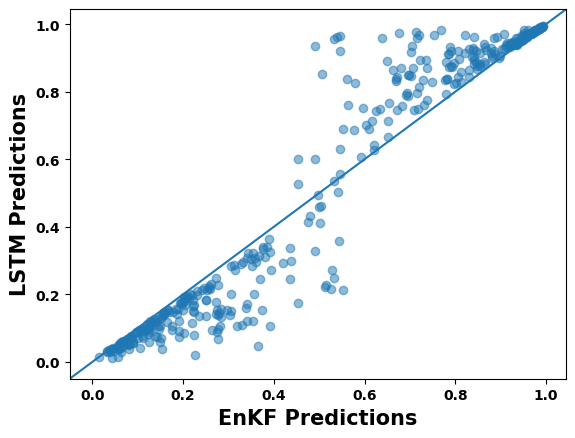

In [128]:
plt.scatter(enkf_preds,true_preds, alpha=0.5)
plt.xlabel("EnKF Predictions", fontsize = 15, fontweight = "bold")
plt.ylabel("LSTM Predictions", fontsize = 15, fontweight = "bold")
plt.xticks(fontsize = 10, fontweight = "bold")
plt.yticks(fontsize = 10, fontweight = "bold")
plt.axline((0, 0), slope=1)

In [129]:
# check

In [130]:
with open('first_lstm_just_lstm_real_world_low_dropout.pkl', 'wb') as f:
    pickle.dump(catch_coverages, f)